###  Handling the central pixels in  a galaxy image.  

Handling of the galaxy image's central region is tricky. Run some experiments here.

We might be facing issues in both the fitting algorithm itself, as well as in the test data building functionality. These might interplay in subtle ways.

In [1]:
import numpy as np
from astropy.io import fits
from ellipse.ellipse import Ellipse
from util import build_test_data

image = build_test_data.build(pa=45./180.*np.pi, noise=1.)

ellipse = Ellipse(image)
isolist = ellipse.fit_image()

Centering on object....   Done. Found x0 = 257.0, y0 = 257.0
#
# Semi-      Isophote         Ellipticity    Position     Grad.   Data  Flag Iter. Stop
# major        mean                           Angle        rel.                    code
# axis       intensity                                    error
#(pixel)                                     (degree)
#
  10.00     1045.66 ( 0.17)  0.199 (0.000)  44.93 ( 0.0)  0.002    57     0   20     0
  11.00      929.64 ( 0.13)  0.199 (0.000)  44.91 ( 0.0)  0.002    62     0   10     0
  12.10      825.46 ( 0.10)  0.199 (0.000)  44.99 ( 0.0)  0.002    68     0   10     0
  13.31      732.34 ( 0.09)  0.199 (0.000)  44.87 ( 0.0)  0.002    75     0   10     0
  14.64      649.55 ( 0.08)  0.199 (0.000)  44.99 ( 0.0)  0.001    83     0   10     0
  16.11      576.26 ( 0.06)  0.200 (0.000)  44.98 ( 0.0)  0.001    91     0   10     0
  17.72      510.87 ( 0.07)  0.200 (0.000)  45.02 ( 0.0)  0.002   100     0   10     0
  19.49      453.27 ( 0.06)  0.2

In [2]:
from ellipse.model import build_model

model = build_model(image, isolist, fill=np.mean(image[0:10,0:10]))

Interpolating....Done
SMA=255.4
Done


In [3]:
residual = image - model

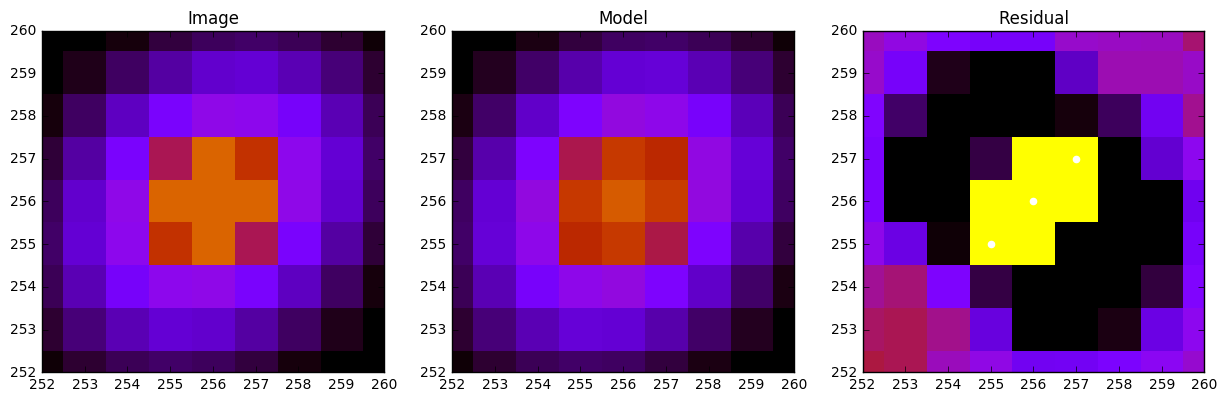

In [4]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))
wide = 4
limits = [256-wide,256+wide]
v1 = 2000
v2 = 12000
ax1.imshow(image, cmap=cm.gnuplot, vmin=v1, vmax=v2, interpolation="nearest")
ax1.set_xlim(limits)
ax1.set_ylim(limits)
ax1.set_title("Image")
ax2.imshow(model, cmap=cm.gnuplot, vmin=v1, vmax=v2, interpolation="nearest")
ax2.set_xlim(limits)
ax2.set_ylim(limits)
ax2.set_title("Model")
ax3.imshow(residual, cmap=cm.gnuplot, vmin=-50, vmax=50, interpolation="nearest")
ax3.set_xlim(limits)
ax3.set_ylim(limits)
ax3.set_title("Residual")
plt.axis([256-wide,256+wide,256-wide,256+wide])
plt.scatter(np.array([255,256,257]), np.array([255,256,257]), color='white')

In [5]:
print(image[254:258,254:258])
print(model[254:258,254:258])

[[ 4201.87487423  5110.2396591   5182.31513667  4326.228634  ]
 [ 5111.54680329  7798.04520149  9315.2195499   6459.12142259]
 [ 5183.09761299  9315.89619803  9316.91083023  9316.61591432]
 [ 4324.7684775   6461.46277342  9316.09036492  7797.79437532]]
[[ 4227.18452949  5155.85828797  5300.90731246  4484.73801541]
 [ 5160.95099778  7400.54975099  8086.00401934  6539.47967102]
 [ 5286.57295131  8044.42379118  9095.5802854   8193.15766369]
 [ 4479.5592156   6506.92473413  8066.7634899   7418.0113193 ]]


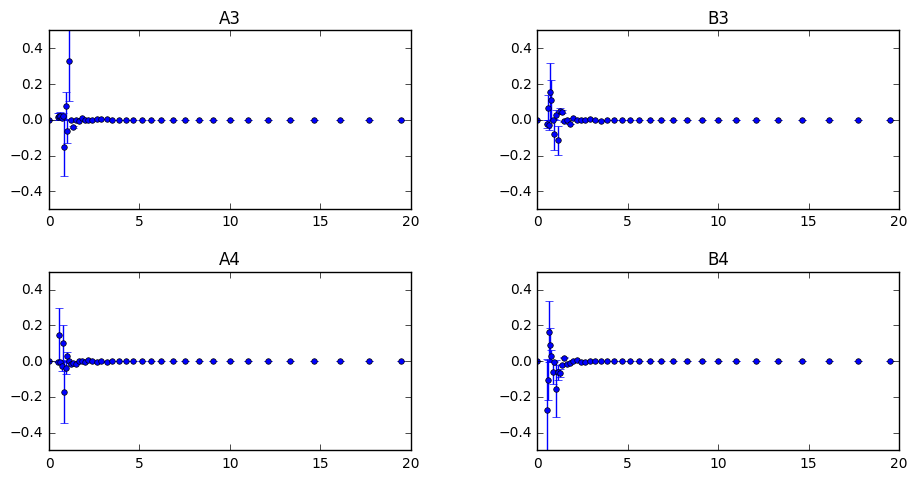

In [6]:
plt.figure(figsize=(10, 5))
plt.figure(1)

limits = [0., 20., -0.5, 0.5]

plt.subplot(221)
plt.axis(limits)
plt.errorbar(isolist.sma, isolist.a3, yerr=isolist.a3_err, fmt='o', markersize=4)
plt.title('A3')

plt.subplot(222)
plt.axis(limits)
plt.errorbar(isolist.sma, isolist.b3, yerr=isolist.b3_err, fmt='o', markersize=4)
plt.title('B3')

plt.subplot(223)
plt.axis(limits)
plt.errorbar(isolist.sma, isolist.a4, yerr=isolist.a4_err, fmt='o', markersize=4)
plt.title('A4')

plt.subplot(224)
plt.axis(limits)
plt.errorbar(isolist.sma, isolist.b4, fmt='o', yerr=isolist.b4_err, markersize=4)
plt.title('B4')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)